## Observations and Insights 

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [38]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [39]:
mouse_metadata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mouse ID      249 non-null    object
 1   Drug Regimen  249 non-null    object
 2   Sex           249 non-null    object
 3   Age_months    249 non-null    int64 
 4   Weight (g)    249 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 9.9+ KB


In [40]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [41]:
study_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 59.3+ KB


In [42]:
mouse_metadata.nunique()


Mouse ID        249
Drug Regimen     10
Sex               2
Age_months       24
Weight (g)       16
dtype: int64

In [43]:
study_results.nunique()

Mouse ID               249
Timepoint               10
Tumor Volume (mm3)    1644
Metastatic Sites         5
dtype: int64

In [44]:
# Combine the data into a single dataset
# Display the data table for preview

fulldata = study_results.merge(mouse_metadata, on='Mouse ID', how='left')
fulldata

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [45]:
# Checking the number of mice.
fulldata.nunique()

Mouse ID               249
Timepoint               10
Tumor Volume (mm3)    1644
Metastatic Sites         5
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
dtype: int64

In [46]:
# Getting the duplicate mice by ID number that shows up for Mouse ID 
# and Timepoint. 



In [47]:
fulldata[fulldata.duplicated() == True]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.0,0,Propriva,Female,21,26


In [48]:
fulldata[fulldata[['Mouse ID','Timepoint']].duplicated() == True]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [49]:
# Optional: Get all the data for the duplicate mouse ID. 

g989 = fulldata[fulldata['Mouse ID'] == 'g989']
g989

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [50]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
finalwork = fulldata[fulldata['Mouse ID'] != 'g989']
finalwork

# finalwork = fulldata[fulldata['Mouse ID'] !=

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [51]:
# Checking the number of mice in the clean DataFrame.
finalwork.nunique()


Mouse ID               248
Timepoint               10
Tumor Volume (mm3)    1633
Metastatic Sites         5
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
dtype: int64

In [52]:
# baseline = fulldata[fulldata[['Mouse ID','Timepoint']].duplicated() == False]
finalwork.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1880 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Timepoint           1880 non-null   int64  
 2   Tumor Volume (mm3)  1880 non-null   float64
 3   Metastatic Sites    1880 non-null   int64  
 4   Drug Regimen        1880 non-null   object 
 5   Sex                 1880 non-null   object 
 6   Age_months          1880 non-null   int64  
 7   Weight (g)          1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.2+ KB


## Summary Statistics

In [53]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the 
# following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the 
# tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [54]:
finalworkbydrug = finalwork.groupby(['Drug Regimen'])
finalworkbydrug

In [55]:
mean = finalworkbydrug['Tumor Volume (mm3)'].mean()
mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [56]:
median = finalworkbydrug['Tumor Volume (mm3)'].median()
median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [57]:
var = finalworkbydrug['Tumor Volume (mm3)'].var()
var

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [58]:
std = finalworkbydrug['Tumor Volume (mm3)'].std()
std

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [59]:
sem = finalworkbydrug['Tumor Volume (mm3)'].sem()
sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [60]:
# useful background source
# https://www.geeksforgeeks.org/creating-a-dataframe-from-pandas-series/
frame = { 'mean': mean, 'median': median, 'var':var, 'std': std , 'sem': sem }
  
result = pd.DataFrame(frame)
  
print(result)


                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


In [61]:
result

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [62]:
import numpy as np
finalworkbydrug[['Tumor Volume (mm3)']].agg([np.mean, np.median, np.var, np.std, st.sem])

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [63]:
# Generate a summary statistics table of mean, median, variance,
# standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary 
# statistics in a single line


## Bar and Pie Charts

In [71]:
timecount = finalworkbydrug['Timepoint'].count()
regimens = list(timecount.index)
regcounts = list(timecount)

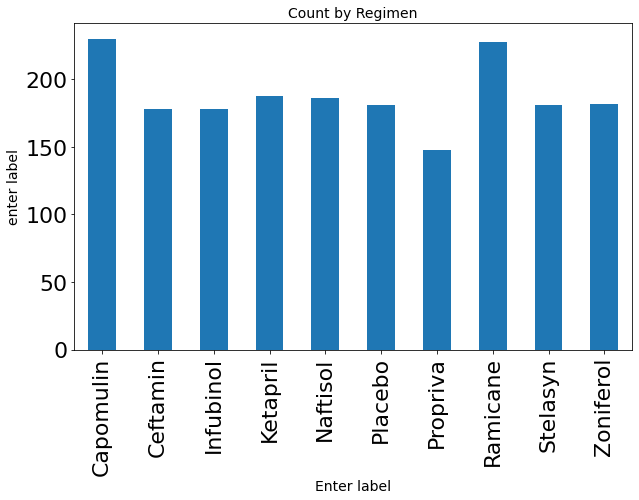

In [77]:
# Generate a bar plot showing the total number of timepoints
# for all mice tested for each drug regimen using Pandas.
plt.rcParams.update({'font.size': 22})
timecount.plot(kind="bar", figsize=(10,6))
plt.xlabel('Enter label', fontsize=14)
plt.ylabel('enter label', fontsize=14)
plt.title('Count by Regimen', fontsize=14)
plt.show()





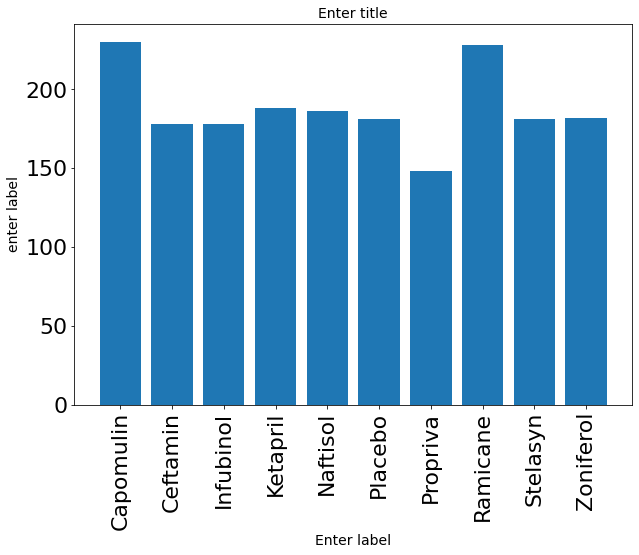

In [78]:
# Generate a bar plot showing the total number of timepoints
# for all mice tested for each drug regimen using pyplot.

plt.figure(figsize =(10, 7))
plt.bar(regimens,regcounts)
plt.title('Enter title', fontsize=14)
plt.xlabel('Enter label', fontsize=14)
plt.ylabel('enter label', fontsize=14)
plt.xticks(rotation='vertical')
plt.show()


In [81]:
MFcount = finalwork['Sex'].value_counts()
MFindlist = list(MFcount.index)
MFvallist = list(MFcount)


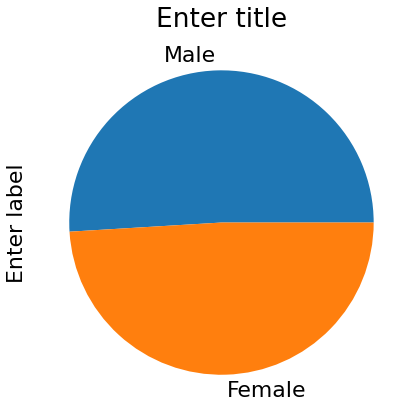

In [85]:
# Generate a pie plot showing the distribution of female
# versus male mice using Pandas
plt.figure(figsize =(10, 7))
MFcount.plot.pie(label='Enter label',title="Enter title");



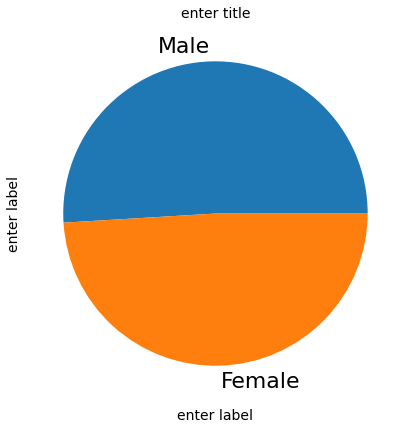

In [86]:
# Generate a pie plot showing the distribution of female
# versus male mice using pyplot

plt.figure(figsize =(10, 7))

plt.title('enter title' ,fontsize=14)
plt.xlabel('enter label', fontsize=14)
plt.ylabel('enter label', fontsize=14)


plt.pie(MFvallist, labels = MFindlist)
 
plt.show()



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across
# four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the 
# tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for 
# plot labels)


# Create empty list to fill with tumor vol data 
# (for plotting)


# Calculate the IQR and quantitatively determine if there
# are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and 
    # get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each 
# mouse across four regimens of interest


## Line and Scatter Plots

In [87]:
finalworkbydrugdict = dict(list(finalworkbydrug))


In [ ]:
# Generate a line plot of tumor volume vs. time point 
# for a mouse treated with Capomulin


In [91]:
capdf = finalworkbydrugdict['Capomulin']
i557 = fulldata[fulldata['Mouse ID'] == 'i557']
TV = i557['Tumor Volume (mm3)']
TP = i557['Timepoint']


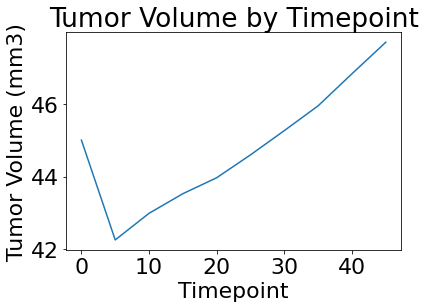

In [95]:
#Year = [1920,1930,1940,1950,1960,1970,1980,1990,2000,2010]
#Unemployment_Rate = [9.8,12,8,7.2,6.9,7,6.5,6.2,5.5,6.3]
  
plt.plot(TP, TV)
plt.title('Tumor Volume by Timepoint')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [ ]:
# Generate a scatter plot of average tumor volume vs. 
# mouse weight for the Capomulin regimen


In [99]:
capdfmousegroups = capdf.groupby(['Mouse ID'])
capdfmousegroupsagg = capdfmousegroups[['Weight (g)','Tumor Volume (mm3)']].agg([np.mean])


In [100]:
capdfmousegroupsagg

,Weight (g),Tumor Volume (mm3)
,mean,mean
Mouse ID,,
b128,22.0,41.963636
b742,21.0,40.083699
f966,17.0,36.505973
g288,19.0,41.990097
g316,22.0,44.613344
i557,24.0,44.805810
i738,20.0,39.141053
j119,23.0,44.465236


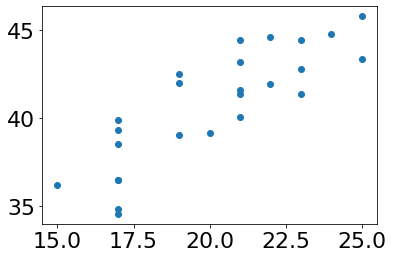

In [101]:

#N = 50
#x = np.random.rand(N)
#y = np.random.rand(N)       #, s=area, c=colors, alpha=0.5)
#colors = np.random.rand(N)
#area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(capdfmousegroupsagg["Weight (g)"],capdfmousegroupsagg['Tumor Volume (mm3)'])
plt.show()

(0.5, 40.0)

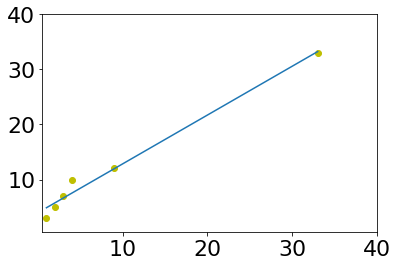

In [102]:
import numpy as np
import matplotlib.pyplot as plt

x = [1,2,3,4,9,33]
y = [3,5,7,10,12,33] # 10, not 9, so the fit isn't perfect

coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y

plt.plot(x,y, 'yo', x, poly1d_fn(x)) #'--k'=black dashed line, 'yo' = yellow circle marker

plt.xlim(0.5, 40)
plt.ylim(0.5, 40)


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear
# regression model 
# for mouse weight and average tumor volume for 
# the Capomulin regimen
